## This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
* (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [2]:
!pip install ISLP

In [3]:
from ISLP import load_data

Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

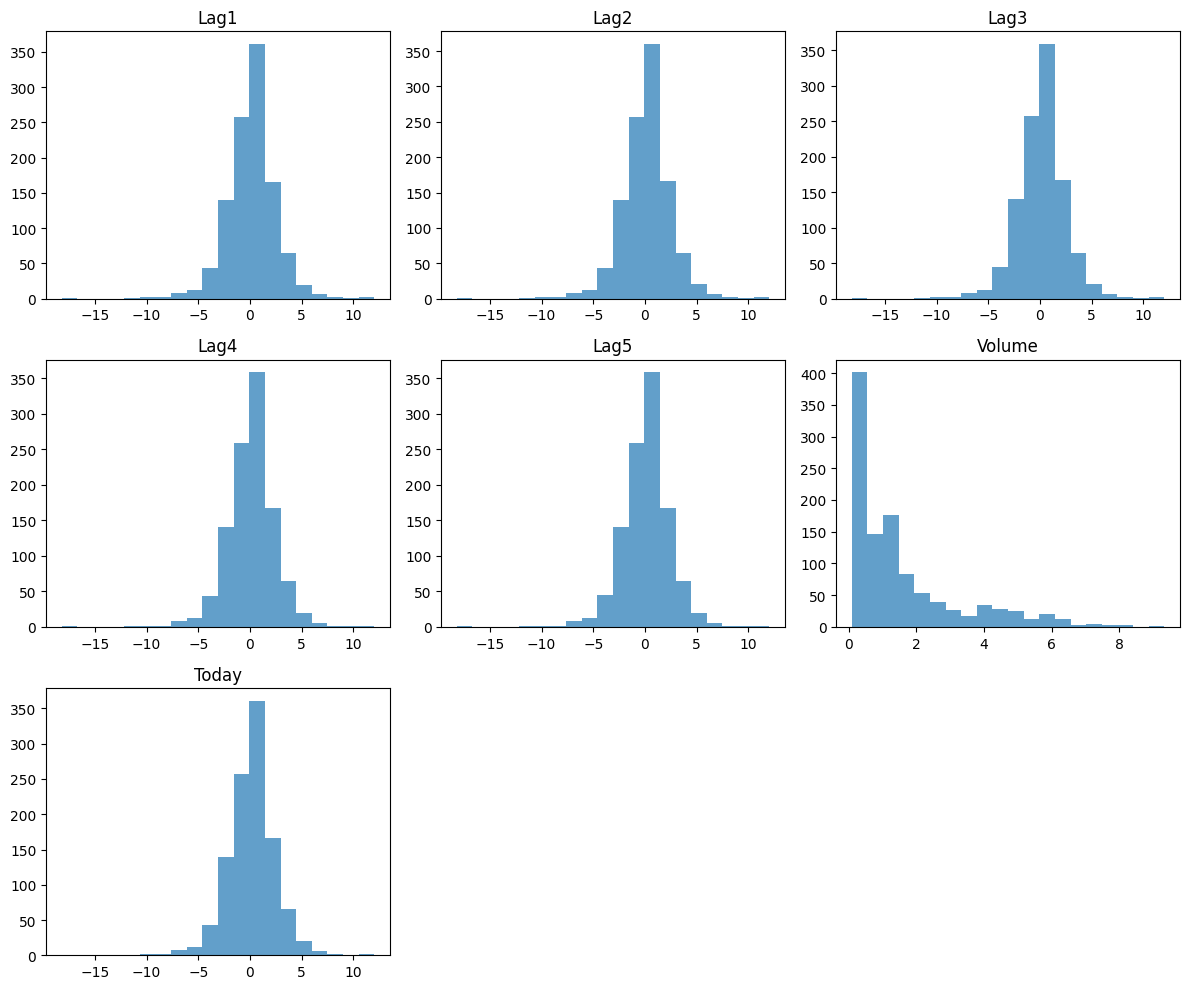

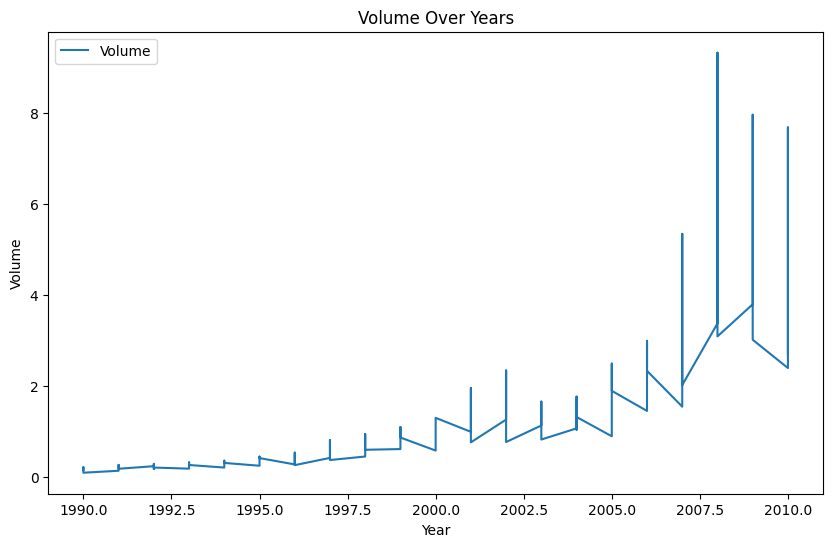

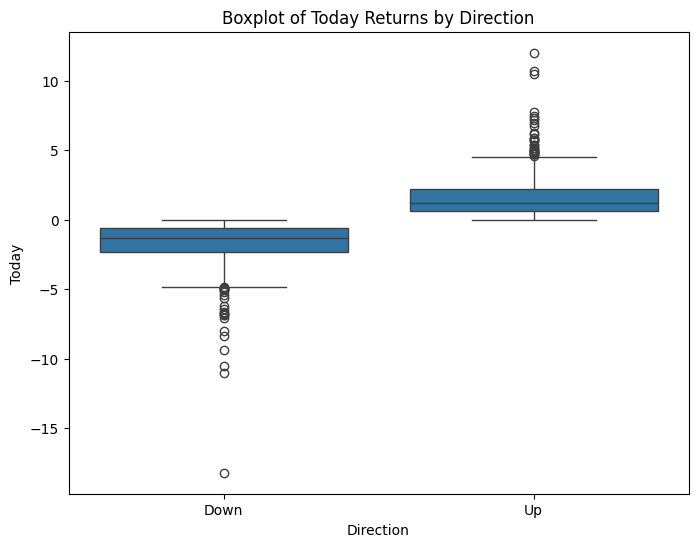

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Weekly dataset
# Weekly = pd.read_csv('path_to_your_Weekly_data.csv')  # replace with your file path if needed

# Numerical summary
numerical_summary = Weekly.describe()
print(numerical_summary)

# Graphical summaries

# Set up a grid for subplots
plt.figure(figsize=(12, 10))

# Plot histograms of continuous variables
for i, column in enumerate(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']):
    plt.subplot(3, 3, i + 1)
    plt.hist(Weekly[column], bins=20, alpha=0.7)
    plt.title(column)

plt.tight_layout()
plt.show()

# Plot the volume over time to check for patterns
plt.figure(figsize=(10, 6))
plt.plot(Weekly['Year'], Weekly['Volume'], label='Volume')
plt.title("Volume Over Years")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Display boxplot of 'Today' returns grouped by 'Direction'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Today', data=Weekly)
plt.title("Boxplot of Today Returns by Direction")
plt.show()


* (b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [5]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
# Weekly = pd.read_csv('path_to_your_Weekly_data.csv')  # Replace with your dataset path

# Encode 'Direction' as binary: 1 for 'Up' and 0 for 'Down'
Weekly['Direction'] = Weekly['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Define predictors and response
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)  # Add constant for intercept
y = Weekly['Direction']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        12:51:06   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

* 統計顯著的變數
  * Lag2：此變數的 p 值為 0.030，低於一般顯著性水準 0.05，顯示它對於預測 Direction 是顯著的。
* 非統計顯著的變數
  * 其他變數（Lag1、Lag3、Lag4、Lag5、Volume）的 p 值均高於 0.05，表示這些變數在預測 Direction 方面沒有顯著影響。

* 結論
在這個模型中，僅 Lag2 為顯著的預測變數。

* (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict probabilities using the logistic regression model
predicted_probabilities = result.predict(X)

# Convert probabilities to binary predictions (using 0.5 as the threshold)
predicted_classes = [1 if prob > 0.5 else 0 for prob in predicted_probabilities]

# Compute the confusion matrix and overall accuracy
conf_matrix = confusion_matrix(y, predicted_classes)
accuracy = accuracy_score(y, predicted_classes)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Accuracy:", accuracy)


Confusion Matrix:
[[ 54 430]
 [ 48 557]]

Overall Accuracy: 0.5610651974288338


從這個混淆矩陣和整體準確率來看，我們可以得出以下觀察：

### 混淆矩陣解讀
- **True Negatives (TN)**: 54，模型正確地預測了 54 次「Down」的情況。
- **False Positives (FP)**: 430，模型錯誤地預測了 430 次「Up」而實際結果是「Down」。
- **False Negatives (FN)**: 48，模型錯誤地預測了 48 次「Down」而實際結果是「Up」。
- **True Positives (TP)**: 557，模型正確地預測了 557 次「Up」的情況。

### 整體準確率
整體準確率為 **56.11%**，顯示此模型的預測性能相對較低，僅略高於隨機猜測。

### 錯誤類型分析
從混淆矩陣可以觀察到以下錯誤傾向：
- 模型的 **False Positives (FP)** 次數較高，意味著它經常錯誤地將「Down」預測為「Up」。
- **False Negatives (FN)** 次數相對較低，但仍然存在錯誤地將「Up」預測為「Down」的情況。

### 結論
該模型在預測「Up」的情況時表現相對較好，但容易將「Down」錯誤預測為「Up」。這樣的錯誤模式可能不適合於需要更精確分辨「Up」和「Down」的應用情境。

* (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [7]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the dataset into training (1990-2008) and testing (2009-2010) sets
train_data = Weekly[Weekly['Year'] <= 2008]
test_data = Weekly[Weekly['Year'] > 2008]

# Training data with Lag2 as the only predictor
X_train = train_data[['Lag2']]
X_train = sm.add_constant(X_train)  # Add intercept
y_train = train_data['Direction']

# Test data
X_test = test_data[['Lag2']]
X_test = sm.add_constant(X_test)  # Add intercept
y_test = test_data['Direction']

# Fit logistic regression model on the training data
logit_model_lag2 = sm.Logit(y_train, X_train)
result_lag2 = logit_model_lag2.fit()

# Predict probabilities for the test set
predicted_probabilities_test = result_lag2.predict(X_test)

# Convert probabilities to binary predictions (using threshold 0.5)
predicted_classes_test = [1 if prob > 0.5 else 0 for prob in predicted_probabilities_test]

# Compute the confusion matrix and overall accuracy for the test set
conf_matrix_test = confusion_matrix(y_test, predicted_classes_test)
accuracy_test = accuracy_score(y_test, predicted_classes_test)

# Print results
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)
print("\nOverall Accuracy for Test Set:", accuracy_test)


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix for Test Set:
[[ 9 34]
 [ 5 56]]

Overall Accuracy for Test Set: 0.625


從這次模型的混淆矩陣和準確率來看，我們可以得到以下的分析：

### 混淆矩陣解讀
- **True Negatives (TN)**: 9，模型正確地預測了 9 次「Down」的情況。
- **False Positives (FP)**: 34，模型錯誤地預測了 34 次「Up」而實際結果是「Down」。
- **False Negatives (FN)**: 5，模型錯誤地預測了 5 次「Down」而實際結果是「Up」。
- **True Positives (TP)**: 56，模型正確地預測了 56 次「Up」的情況。

### 整體準確率
這個模型在測試集上的整體準確率為 **62.5%**。雖然這比隨機猜測略好，但並不特別高，說明在未見數據上模型的預測效果仍有改進空間。

### 錯誤類型分析
- **False Positives (FP)** 的數量較多，顯示模型有時會傾向於錯誤地將「Down」預測為「Up」。這可能表明模型在處理「Down」的情況時表現較弱。
- **False Negatives (FN)** 的數量較少，說明模型對「Up」的預測相對較準確。

### 總結
這個模型在預測「Up」的能力上比預測「Down」要好，但準確率只有 62.5%，顯示出這個模型可能過於簡單，未能充分捕捉到更複雜的模式。